In [17]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



import os

In [18]:
data = pd.read_csv('D:Video games sales analysis/vgsales_2021.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2010,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1989,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2012,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2013,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,2000,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [20]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

1. Top 10 thể loại game được làm nhiều nhất


Hầu hết mọi người đều thích game hành động và thể thao. 3316 game hành động và trong 2346 game thể thao. Các game không được ưa chuộng game chiến đấu (Fighting) chỉ có 848, game chiến thuật (Strategy) chỉ có 681

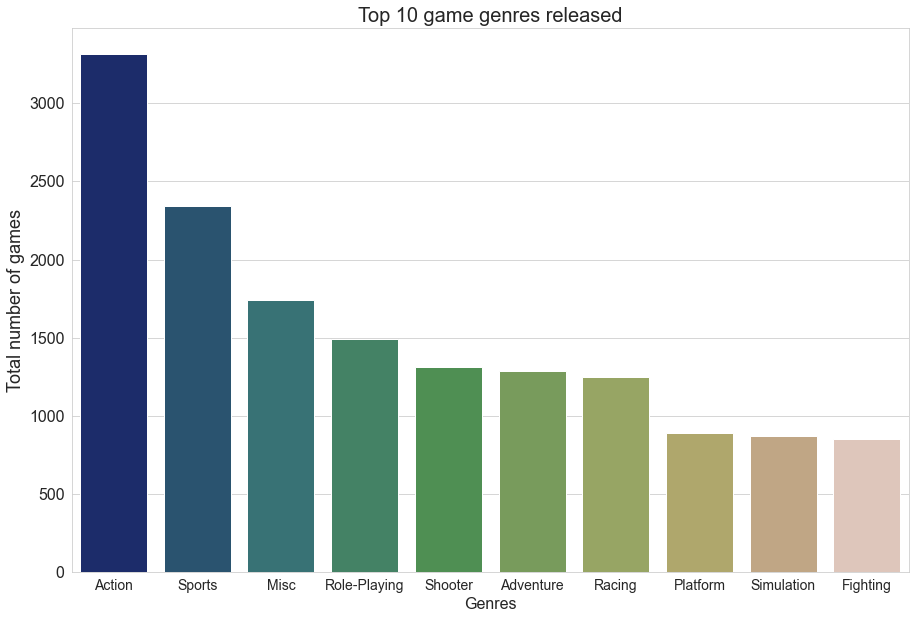

In [21]:
plt.figure(figsize=(15, 10))
sns.color_palette("tab10")
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().iloc[:10].index, palette='gist_earth')
plt.xticks(size=14)
plt.yticks(size= 16)
plt.title("Top 10 game genres released", fontsize=20)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Total number of games',fontsize=18)
plt.savefig('1.png')


In [22]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

2. Năm có nhiều game phát hành nhất

Năm 2012, 2013, 2014 là những năm yêu thích trò chơi

2012    1462
2013    1449
2014    1290
2011    1221
2015    1152
2010    1026
2009     949
2006     847
2007     788
2008     769
2016     673
2019     619
2018     591
2017     557
2005     491
2002     386
2004     356
2020     349
2003     343
2001     296
2000     267
1999     221
1998     125
1997      60
1985      46
1996      43
1995      43
1986      36
1990      21
1993      17
1987      17
1994      16
1991      16
1992      15
1989      14
1988      14
1984       9
2021       4
Name: Year, dtype: int64

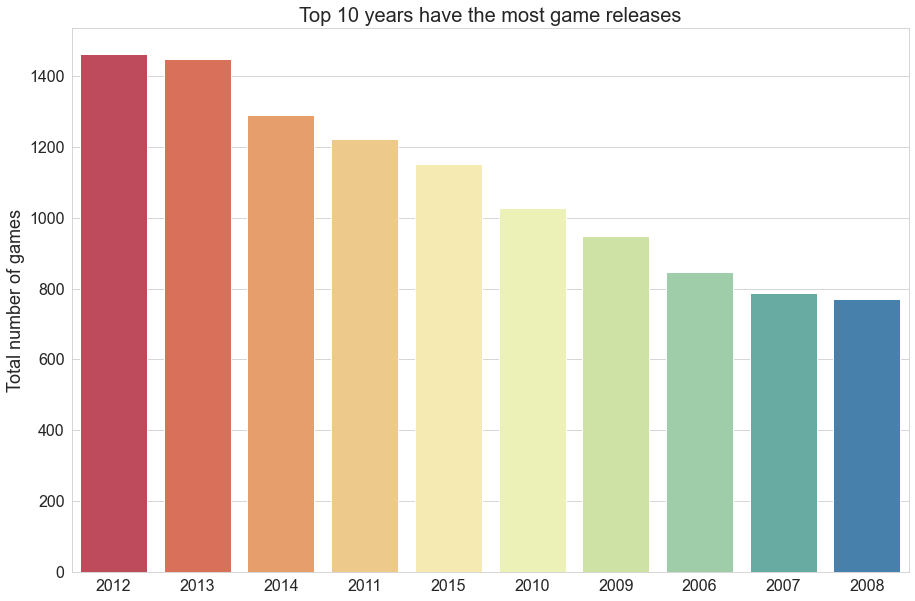

In [23]:
plt.figure(figsize=(15, 10))


sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).iloc[:10].index, palette='Spectral')
plt.xticks(size=16)
plt.yticks(size=16)
plt.title("Top 10 years have the most game releases", fontsize=20)
plt.xlabel('')
plt.ylabel('Total number of games',fontsize=18)
plt.savefig('2.png')
data['Year'].value_counts()


3. Thể loại trò chơi có giá bán cao nhất trên toàn cầu


           Genre  Global_Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37
3           Misc        809.96
6         Racing        732.04
2       Fighting        448.91
9     Simulation        392.20
5         Puzzle        244.95
1      Adventure        239.04
11      Strategy        175.12


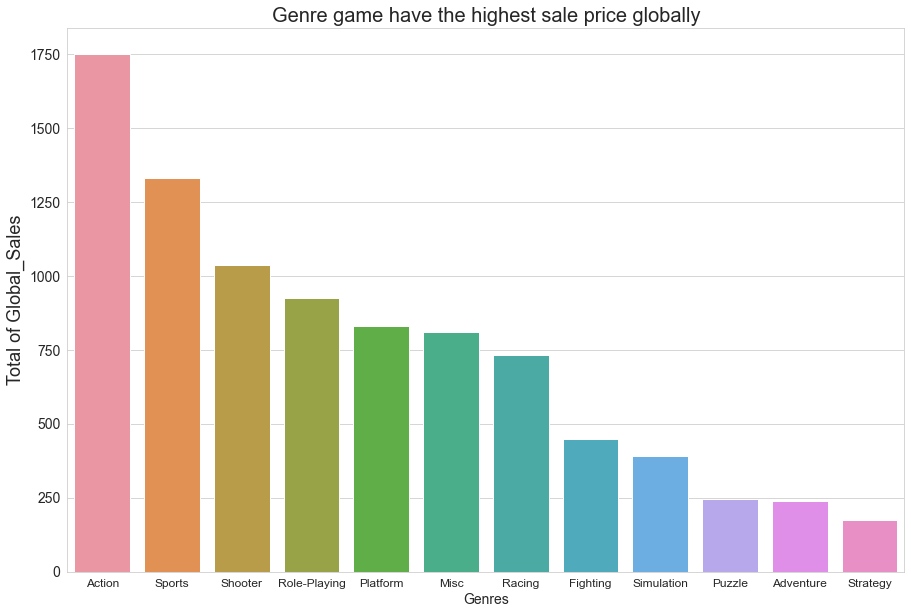

In [24]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(size=12)
plt.yticks(size=14)
plt.title("Genre game have the highest sale price globally", fontsize=20)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total of Global_Sales',fontsize=18)
plt.savefig('3.png')
print(data_genre)

Hành động và Thể thao luôn được đặt lên hàng đầu do số lượng lớn. Nhưng ở câu thứ ba là "Shooter" tuy không nhiều loại game nhưng giá bán khá ổn định và thuộc top đầu

4. Top 10 nền tảng có ​​giá bán cao nhất trên toàn cầu

In [25]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False).iloc[:10]
# data_platform

   Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
18      PS4        278.10
13       PC        258.82


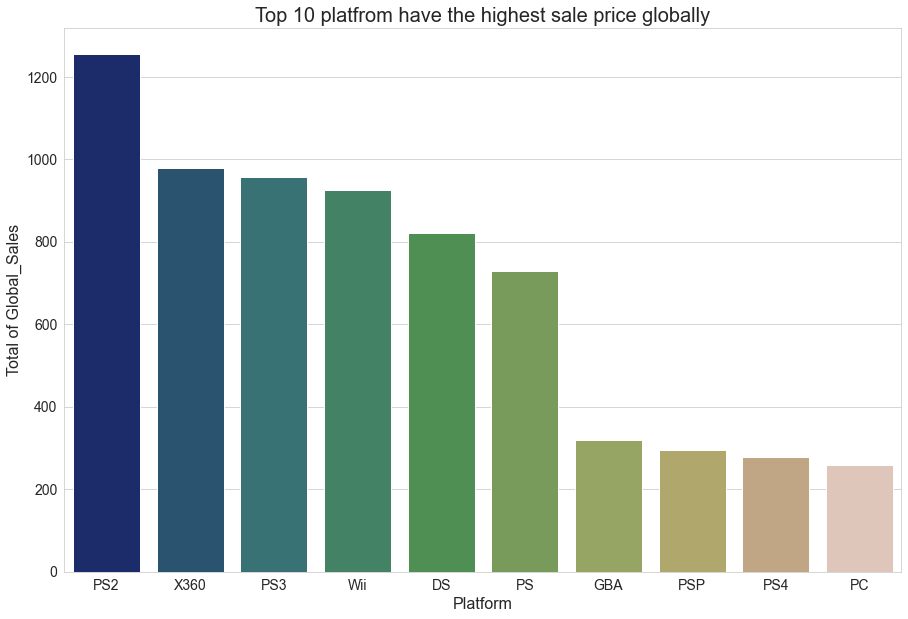

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform, palette='gist_earth')
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Top 10 platfrom have the highest sale price globally", fontsize=20)
plt.xlabel('Platform', fontsize = 16)
plt.ylabel('Total of Global_Sales',fontsize=16)
plt.savefig('4.png')
print(data_platform)

Dẫn đầu là PS2, X360, PS3

5. Top 10 nhà phát hành về số lượng game

In [27]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(10)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

                      Publisher  Name
0               Electronic Arts  1354
1                    Activision   977
2            Namco Bandai Games   939
3                       Ubisoft   925
4  Konami Digital Entertainment   834
5                           THQ   716
6                      Nintendo   704
7   Sony Computer Entertainment   684
8                          Sega   640
9          Take-Two Interactive   416


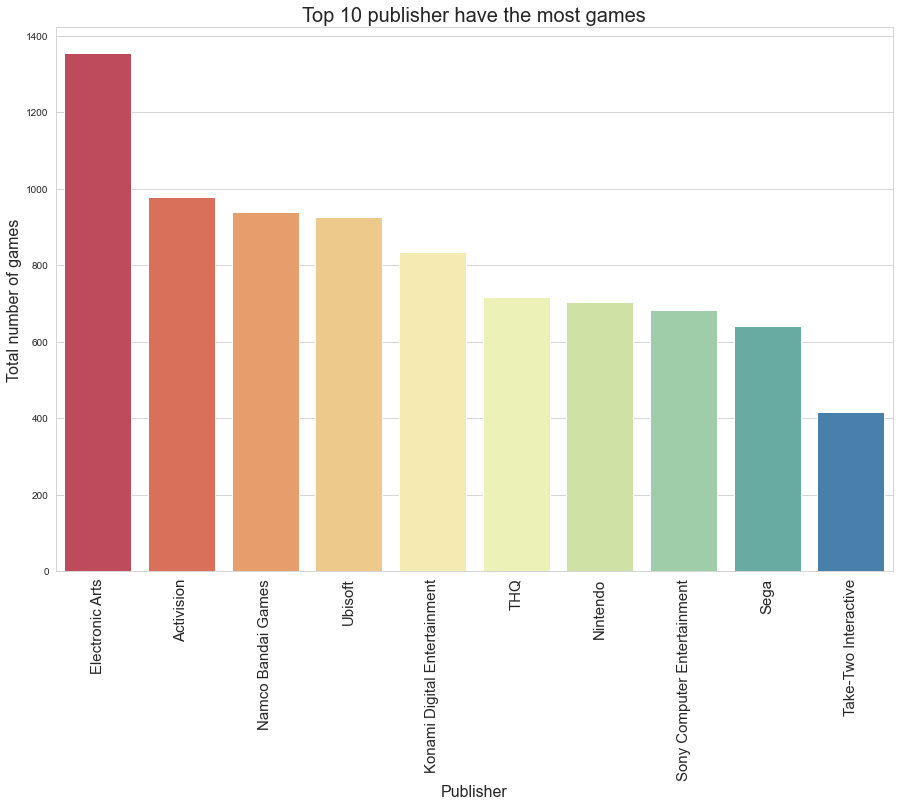

In [28]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:10].index, palette='Spectral')
plt.xticks(rotation=90, fontsize= 15)
plt.title("Top 10 publisher have the most games", fontsize=20)
plt.xlabel('Publisher', fontsize = 16)
plt.ylabel('Total number of games',fontsize=16)
plt.savefig('5.png')
print(top_publisher)

Vượt trội là Electronic Arts với 1339, xếp sau là Activision với 977, Namco Bandai Games với 939

6. Doanh số toàn cầu hàng đầu theo nhà xuất bản

In [29]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(11)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

                       Publisher  Global_Sales
0                       Nintendo       1786.57
1                Electronic Arts       1111.96
2                     Activision        727.91
3    Sony Computer Entertainment        608.43
4                        Ubisoft        476.12
5           Take-Two Interactive        400.13
6                            THQ        342.23
7   Konami Digital Entertainment        283.98
8                           Sega        273.63
9             Namco Bandai Games        255.29
10        Microsoft Game Studios        245.79


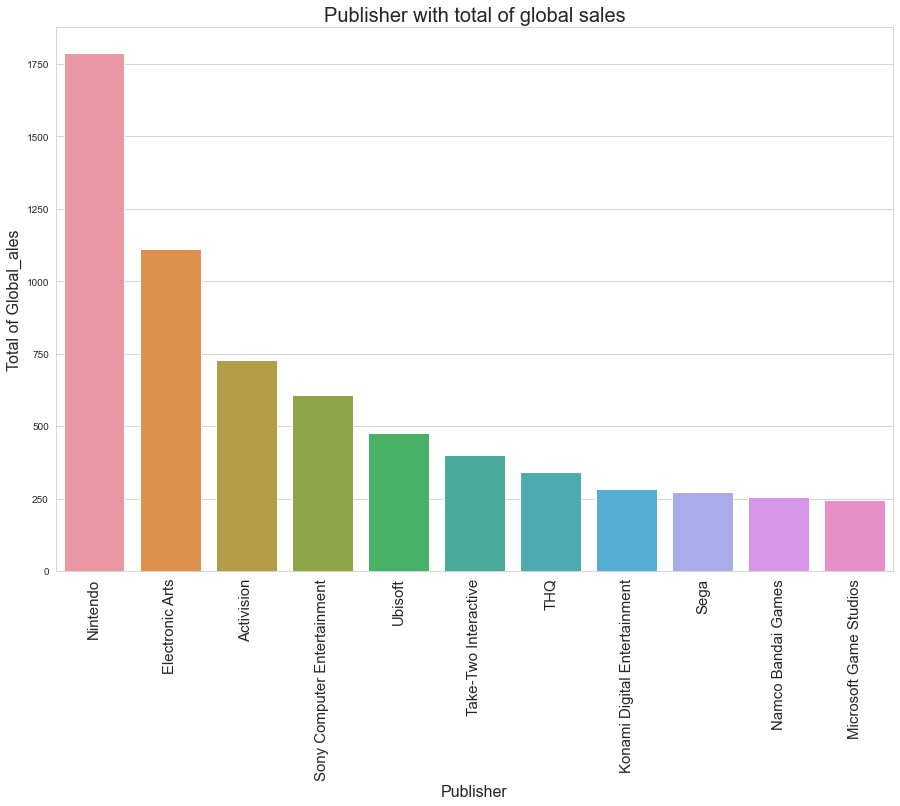

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90, fontsize= 15)
plt.title("Publisher with total of global sales", fontsize=20)
plt.xlabel('Publisher', fontsize = 16)
plt.ylabel('Total of Global_ales',fontsize=16)
plt.savefig('6.png')
print(sale_pbl)

Nintendo có doanh thu cao nhất mặc dù không có quá nhiều game (đứng thứ 6 về số lượng game)


7. Tổng doanh thu theo khu vực


        region     sale
0     NA_Sales  4392.95
1     EU_Sales  2434.13
2     JP_Sales  1291.02
3  Other_Sales   797.75


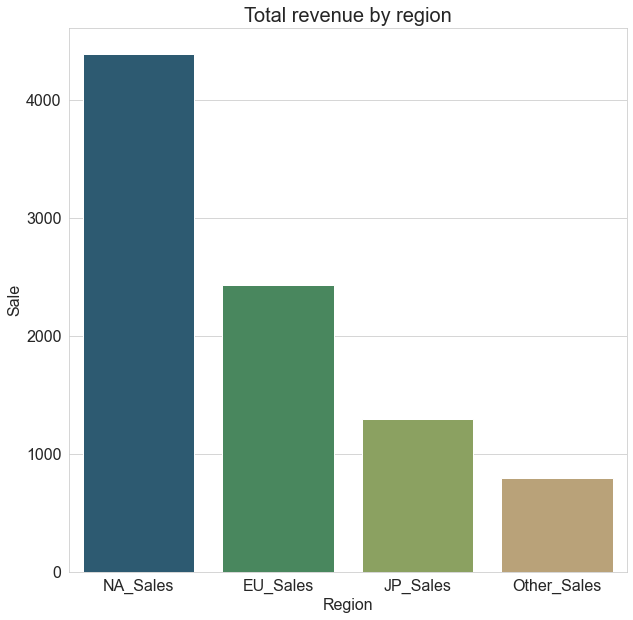

In [31]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
plt.figure(figsize=(10, 10))
sns.barplot(x='region', y='sale', data = top_sale_reg, palette='gist_earth')
plt.xticks(fontsize= 16)
plt.yticks(fontsize=16)
plt.title("Total revenue by region", fontsize=20)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Sale',fontsize=16)
plt.savefig('7.1.png')
print(top_sale_reg)


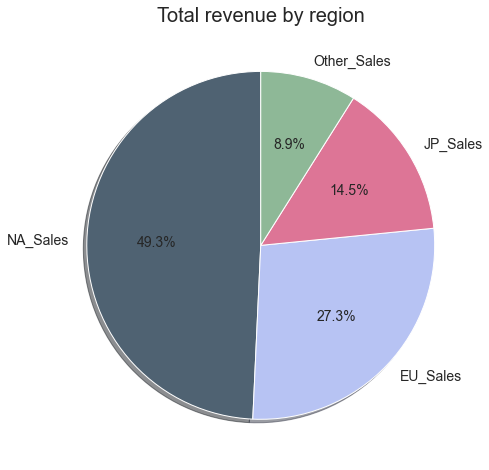

In [32]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14}, colors=colors)
plt.title("Total revenue by region", fontsize=20)
plt.savefig('7.2.png')



Bắc Mỹ gần như chiếm 50% doanh thu